In [2]:
%matplotlib inline
#%matplotlib notebook

#Basic stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# ML models
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score, median_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer

# Initialize tqdm progress bar
from tqdm import tqdm, tnrange, tqdm_notebook
from tqdm.auto import tqdm
tqdm.pandas(tqdm_notebook)

In [3]:
# The averaged random forest model
%reload_ext autoreload
%autoreload 2
from AverageRF import AverageRF
from utils import train_test_split_data, evaluate_model

# Data

In [4]:
active = pd.read_pickle("./active.pkl.bz2")

In [6]:
# Prepare a DataFrame with only the data we need
columns = ['PUBCHEM_SID', 'RDKit Fingerprints', 'Log IC50']
data = active.filter(columns,axis=1)
data.reset_index(inplace=True)

In [9]:
# This split will return the indices for X, and the y values
X_data = np.array(list(data['RDKit Fingerprints'])).astype(int)
y_data = data['Log IC50'].values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.10, shuffle=True)

print("X_train:", len(X_train), "\t\ty_train:",len(y_train))
print("X_test: ", len(X_test), "\t\ty_test: ",len(y_test))
print("-"*36)
print("TOTAL:",len(X_train) + len(X_test))

X_train: 746 		y_train: 746
X_test:  83 		y_test:  83
------------------------------------
TOTAL: 829


In [10]:
X_test.shape, y_test.shape

((83, 2048), (83,))

In [11]:
n_estimators=[150,250,350,450] # Number of estimators
criterion=['mse','mae']
max_features=[None,0.33,'sqrt']
bootstrap=[True,False]

## Create the random grid
param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'max_features': max_features,
              'bootstrap':bootstrap}

In [14]:
model = RandomForestRegressor(random_state=42, n_jobs=4)

scoring = {'Explained Variance': make_scorer(explained_variance_score),
           'MAE':make_scorer(mean_absolute_error),
           'MSE':make_scorer(mean_squared_error),
           'MedAE':make_scorer(median_absolute_error),
           'R2': make_scorer(r2_score)}

gs = GridSearchCV(estimator=model, param_grid=param_grid,
                  scoring=scoring, refit='R2',
                  cv=5, verbose=2)

gs.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] bootstrap=True, criterion=mse, max_features=None, n_estimators=150 
[CV]  bootstrap=True, criterion=mse, max_features=None, n_estimators=150, total=  13.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.9s remaining:    0.0s


[CV] bootstrap=True, criterion=mse, max_features=None, n_estimators=150 
[CV]  bootstrap=True, criterion=mse, max_features=None, n_estimators=150, total=   4.2s
[CV] bootstrap=True, criterion=mse, max_features=None, n_estimators=150 
[CV]  bootstrap=True, criterion=mse, max_features=None, n_estimators=150, total=   4.4s
[CV] bootstrap=True, criterion=mse, max_features=None, n_estimators=150 
[CV]  bootstrap=True, criterion=mse, max_features=None, n_estimators=150, total=   4.3s
[CV] bootstrap=True, criterion=mse, max_features=None, n_estimators=150 
[CV]  bootstrap=True, criterion=mse, max_features=None, n_estimators=150, total=   4.3s
[CV] bootstrap=True, criterion=mse, max_features=None, n_estimators=250 
[CV]  bootstrap=True, criterion=mse, max_features=None, n_estimators=250, total=   6.6s
[CV] bootstrap=True, criterion=mse, max_features=None, n_estimators=250 
[CV]  bootstrap=True, criterion=mse, max_features=None, n_estimators=250, total=   6.7s
[CV] bootstrap=True, criterion=mse

[CV]  bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=350, total=   1.2s
[CV] bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=350 
[CV]  bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=350, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=350 
[CV]  bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=350, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=350 
[CV]  bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=350, total=   1.0s
[CV] bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=450 
[CV]  bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=450, total=   1.1s
[CV] bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=450 
[CV]  bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=450, total=   1.1s
[CV] bootstrap=True, criterion=mse, max_features=sqrt, n_estimators=450 
[CV]  bootstrap=True, criterion=ms

[CV] bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=150 
[CV]  bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=150, total=   1.6s
[CV] bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=150 
[CV]  bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=150, total=   1.6s
[CV] bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=150 
[CV]  bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=150, total=   1.6s
[CV] bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=250 
[CV]  bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=250, total=   2.3s
[CV] bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=250 
[CV]  bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=250, total=   2.5s
[CV] bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=250 
[CV]  bootstrap=True, criterion=mae, max_features=sqrt, n_estimators=250, total=   2.3s
[CV] bootstrap=True, criterion=mae

[CV]  bootstrap=False, criterion=mse, max_features=0.33, n_estimators=350, total=   5.4s
[CV] bootstrap=False, criterion=mse, max_features=0.33, n_estimators=350 
[CV]  bootstrap=False, criterion=mse, max_features=0.33, n_estimators=350, total=   5.6s
[CV] bootstrap=False, criterion=mse, max_features=0.33, n_estimators=350 
[CV]  bootstrap=False, criterion=mse, max_features=0.33, n_estimators=350, total=   5.5s
[CV] bootstrap=False, criterion=mse, max_features=0.33, n_estimators=450 
[CV]  bootstrap=False, criterion=mse, max_features=0.33, n_estimators=450, total=   7.4s
[CV] bootstrap=False, criterion=mse, max_features=0.33, n_estimators=450 
[CV]  bootstrap=False, criterion=mse, max_features=0.33, n_estimators=450, total=   7.3s
[CV] bootstrap=False, criterion=mse, max_features=0.33, n_estimators=450 
[CV]  bootstrap=False, criterion=mse, max_features=0.33, n_estimators=450, total=   7.1s
[CV] bootstrap=False, criterion=mse, max_features=0.33, n_estimators=450 
[CV]  bootstrap=False,

[CV]  bootstrap=False, criterion=mae, max_features=0.33, n_estimators=150, total=  26.2s
[CV] bootstrap=False, criterion=mae, max_features=0.33, n_estimators=150 
[CV]  bootstrap=False, criterion=mae, max_features=0.33, n_estimators=150, total=  25.3s
[CV] bootstrap=False, criterion=mae, max_features=0.33, n_estimators=150 
[CV]  bootstrap=False, criterion=mae, max_features=0.33, n_estimators=150, total=  25.5s
[CV] bootstrap=False, criterion=mae, max_features=0.33, n_estimators=250 
[CV]  bootstrap=False, criterion=mae, max_features=0.33, n_estimators=250, total=  42.3s
[CV] bootstrap=False, criterion=mae, max_features=0.33, n_estimators=250 
[CV]  bootstrap=False, criterion=mae, max_features=0.33, n_estimators=250, total=  41.8s
[CV] bootstrap=False, criterion=mae, max_features=0.33, n_estimators=250 
[CV]  bootstrap=False, criterion=mae, max_features=0.33, n_estimators=250, total=  42.4s
[CV] bootstrap=False, criterion=mae, max_features=0.33, n_estimators=250 
[CV]  bootstrap=False,

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 120.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=4,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [150, 250, 350, 450], 'criterion': ['mse', 'mae'], 'max_features': [None, 0.33, 'sqrt'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit='R2', return_train_score='warn',
       scoring={'Explained Variance': make_scorer(explained_variance_score), 'MAE': make_scorer(mean_absolute_error), 'MSE': make_scorer(mean_squared_error), 'MedAE': make_scorer(median_absolute_error), 'R2': make_scorer(r2_score)},
       verbose=2)

In [16]:
gs.cv_results_

{'mean_fit_time': array([  5.66562905,   6.34625769,   8.74882274,  11.96316328,
          1.46592722,   2.28458366,   3.22367744,   4.02461114,
          0.27884316,   0.49417739,   0.6183722 ,   0.65658426,
         43.68025146,  72.63489833, 100.59993606, 127.84305511,
         14.48612556,  23.75637474,  33.29442863,  45.12888284,
          1.21605215,   1.93965707,   2.61587586,   3.30300055,
          6.30323949,  10.54898219,  14.3578958 ,  18.45999236,
          2.18993802,   3.67818298,   5.10872459,   6.67815838,
          0.31887956,   0.61493864,   0.70256124,   0.96325731,
         73.98010216, 123.77231889, 172.67761078, 220.71282892,
         25.0406323 ,  41.66194897,  58.37813931,  74.65388637,
          1.91794696,   3.19395065,   4.49367642,   5.64142504]),
 'std_fit_time': array([3.57103062, 0.16352569, 0.10585864, 0.52821362, 0.02017219,
        0.02584229, 0.0718101 , 0.04645089, 0.04092807, 0.06958584,
        0.08267538, 0.04523503, 0.32809191, 0.67051894, 1.153

In [18]:
df_rf_opt = pd.DataFrame(gs.cv_results_)

In [54]:
df_rf_opt.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_Explained Variance,split1_test_Explained Variance,split2_test_Explained Variance,split3_test_Explained Variance,split4_test_Explained Variance,mean_test_Explained Variance,...,mean_test_R2,std_test_R2,rank_test_R2,split0_train_R2,split1_train_R2,split2_train_R2,split3_train_R2,split4_train_R2,mean_train_R2,std_train_R2
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,29.006633,0.473384,0.520930,0.002095,0.241464,0.147872,0.161230,0.345928,0.196991,0.218727,...,0.207211,0.081223,24.50,0.948791,0.950535,0.950076,0.945523,0.951136,0.949212,0.002062
std,48.169482,0.791739,0.004781,0.009593,0.195287,0.206666,0.198278,0.129948,0.115541,0.165789,...,0.166348,0.040031,14.00,0.051763,0.050031,0.050529,0.055104,0.049450,0.051370,0.002081
min,0.278843,0.009263,0.519184,0.000273,-0.303583,-0.355876,-0.399690,-0.041605,-0.087307,-0.217758,...,-0.224235,0.054027,1.00,0.891461,0.892873,0.890179,0.882811,0.896135,0.890855,0.000026
25%,2.127368,0.045110,0.519770,0.000486,0.299301,0.215228,0.218683,0.362909,0.223896,0.272255,...,0.254316,0.062183,12.75,0.898121,0.901244,0.900650,0.891109,0.901721,0.898937,0.000027
50%,5.984434,0.108583,0.520282,0.000631,0.314108,0.232818,0.240072,0.389442,0.239722,0.283847,...,0.272768,0.065820,24.50,0.951398,0.953372,0.952449,0.948905,0.954184,0.951512,0.001752
75%,35.386309,0.515254,0.520665,0.000896,0.330120,0.249929,0.256468,0.408600,0.257161,0.301091,...,0.292390,0.069508,36.25,0.999948,0.999947,1.000000,0.999943,1.000000,0.999968,0.004071
max,220.712829,3.571031,0.553179,0.067141,0.376280,0.269817,0.270642,0.438677,0.289995,0.318230,...,0.312735,0.196337,48.00,0.999948,0.999947,1.000000,0.999943,1.000000,0.999968,0.005193


In [21]:
gs.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=4,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [22]:
gs.best_params_

{'bootstrap': False,
 'criterion': 'mse',
 'max_features': 'sqrt',
 'n_estimators': 250}

In [23]:
gs.best_index_

33

In [27]:
df_rf_opt.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_bootstrap', 'param_criterion', 'param_max_features',
       'param_n_estimators', 'params', 'split0_test_Explained Variance',
       'split1_test_Explained Variance', 'split2_test_Explained Variance',
       'split3_test_Explained Variance', 'split4_test_Explained Variance',
       'mean_test_Explained Variance', 'std_test_Explained Variance',
       'rank_test_Explained Variance', 'split0_train_Explained Variance',
       'split1_train_Explained Variance', 'split2_train_Explained Variance',
       'split3_train_Explained Variance', 'split4_train_Explained Variance',
       'mean_train_Explained Variance', 'std_train_Explained Variance',
       'split0_test_MAE', 'split1_test_MAE', 'split2_test_MAE',
       'split3_test_MAE', 'split4_test_MAE', 'mean_test_MAE', 'std_test_MAE',
       'rank_test_MAE', 'split0_train_MAE', 'split1_train_MAE',
       'split2_train_MAE', 'split3_train_MAE', 'split4_tr

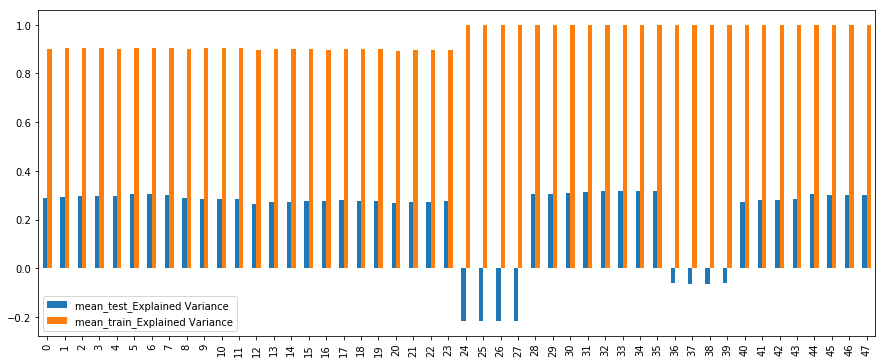

In [56]:
df_rf_opt.plot.bar(y=["mean_test_Explained Variance","mean_train_Explained Variance"], figsize=(15,6))

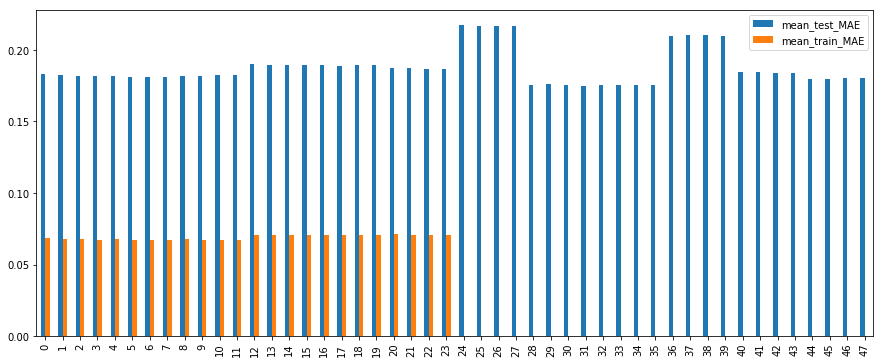

In [31]:
df_rf_opt.plot.bar(y=["mean_test_MAE","mean_train_MAE"], figsize=(15,6))

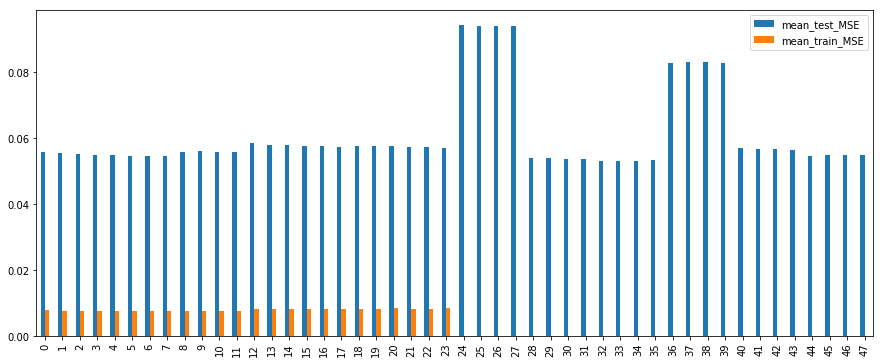

In [33]:
df_rf_opt.plot.bar(y=["mean_test_MSE","mean_train_MSE"], figsize=(15,6))

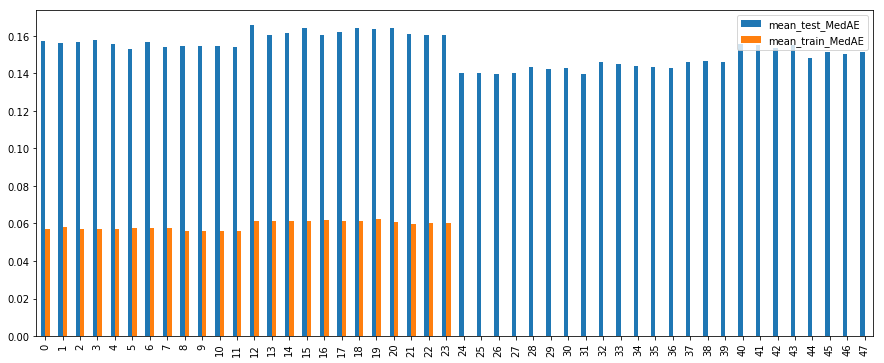

In [34]:
df_rf_opt.plot.bar(y=["mean_test_MedAE","mean_train_MedAE"], figsize=(15,6))

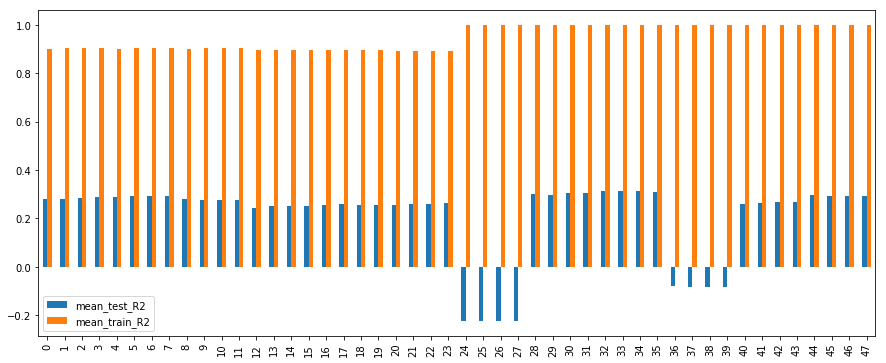

In [48]:
df_rf_opt.plot.bar(y=["mean_test_R2","mean_train_R2"], figsize=(15,6))

In [66]:
df_rf_opt.iloc[33].head()

mean_fit_time         0.614939
std_fit_time        0.00956473
mean_score_time       0.520042
std_score_time     0.000632062
param_bootstrap          False
Name: 33, dtype: object